<a href="https://colab.research.google.com/github/tirunap/ML-Project/blob/main/Flight_Ticket_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import zipfile
import tqdm
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy

In [3]:
from google.colab import files
files.upload()

Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00O%TO\x8c\xc9u\x0f\xff\xff\xff\xff\xff\xff\xff\xff\x0f\x00\x14\x00Data_Train.xlsx\x01\x00\x10\x00\xd5\x17\x08\x00\x00\x00\x00\x00\xf6\xab\x07\x00\x00\x00\x00\x004Z\x07<\xd4\xff\xff\'+\x84\x90Qf\xb6\x10)g\xaf\x90QBBG\x1cuRFB\xf69\xab\xb2\xb2G\xc3\x0cIF\xa7\xb32\xcf\xcc9\x19e\x13\xb2\xc7\xd9\xfb8\xfc\xdf\xe7\xfb\xfb?\x1ew\xee\xf0~\x7f\xde\xaf\xd7\xeb\xfdz=_\xcf\xd7\xeb\xfd6\xbeMAy\x81\x8c\x8c\xec,x_&\xfb\xe4\x80\xa2\x7f\xb3@C\xe6\xe5\xa5N\xc6\t\xfe\xe2\xe3,\xed\xed\xea\xee\xe4\xf1\xd4\xde\xfe\xa5\x87\xf4\xe9\xc7\xb5\xab>.\xceo\xebn\'\xee\xfcr\xcb\xad\xca\x84iN#?\xd2\xf8\x86\xbd\xbdgUz\x95,\xb7s\xe8\xef\xae\xf3f\xa2\xb6\x93\r\\\xc8\xea#ao\xcb\x9c\xe7\x82\xd9j\xc6\xa4\xa2r\x04\xef\x04\xb9\xecx\x91\x86\xda\xc5\xf8x\x0c\x11u\xd2\xcd\x87<)\r<Y\xec\x0e$\x8ce\x1e\xef\xef\xa9O\x1cwL\xcf\xab\x1f.\xc6b\x08\xbd\xae\x81{m\x81\x84\xc3\xcc\x13\xd8\xc9\xfc\xe1\x89\x12\xf2\xb8\x14C\xdc\x19\x0c$\xae\xa0\x02O\xbe\xa8\x1fo\xef\xa9\x9f\x04\x06\x1ett\x9f\xe0\xd

In [ ]:
#data is downloaded using kaggle API
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/EDA
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c rEDA(exploratory data analysis).ipynb

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `kaggle competitions download -c rEDA(exploratory data analysis).ipynb'


In [4]:
#unzipping all the downloaded files
!unzip \*.zip  && rm *.zip

Archive:  archive.zip
  inflating: Data_Train.xlsx         
  inflating: Sample_submission.xlsx  
  inflating: Test_set.xlsx           


In [5]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import zipfile
import tqdm
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
import scipy

In [6]:
train_data = pd.read_excel("/content/Data_Train.xlsx")

# EDA (Exploratory Data Analysis)

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
train_data.shape

(10683, 11)

In [10]:
train_data.size

117513

In [11]:
print("----------Train Data----------\n")
train_data.info()

----------Train Data----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
print("----------Train Data----------\n")
train_data.columns

----------Train Data----------



Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:

print("Number of duplicates in train dataset:{} ".format(sum(train_data.duplicated())))

Number of duplicates in train dataset:220 


In [15]:
print("We have {} NaN/Null values in train dataset ".format(train_data.isnull().values.sum()))

We have 2 NaN/Null values in train dataset 


In [16]:
train_data.dropna(inplace=True)#droppping the missing values

In [17]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [18]:
train_data['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


# Plotting Based Analysis

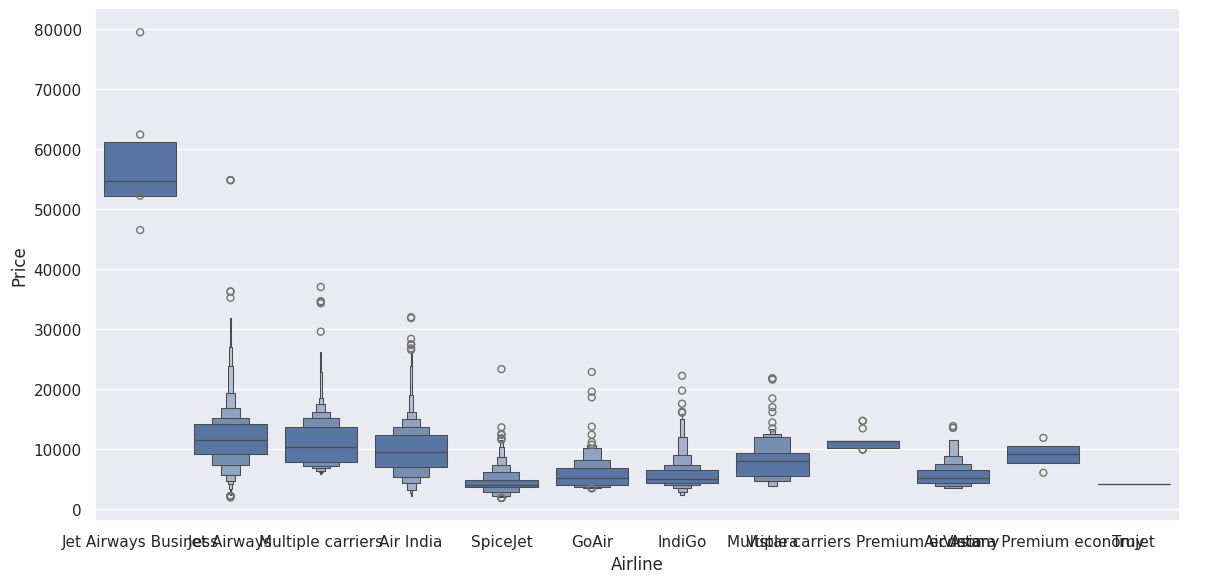

In [26]:
#Airline vs Price
sns.catplot(y="Price", x="Airline",data=train_data.sort_values("Price",ascending=False), kind='boxen', height=6, aspect=2)
plt.show()

We can see that Jet Airways Business have the highest price

In [27]:
train_data['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


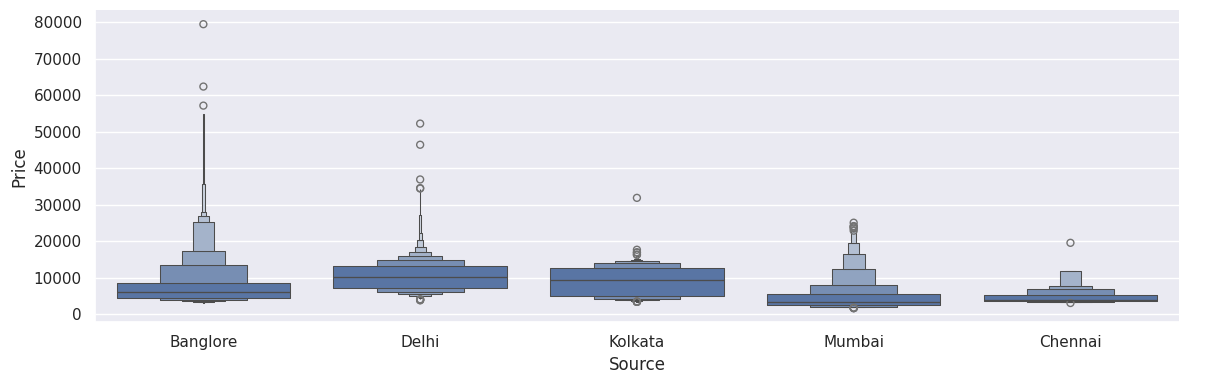

In [28]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 4, aspect = 3)
plt.show()

# There are more outliers present in Bagalore

In [29]:
train_data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [30]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

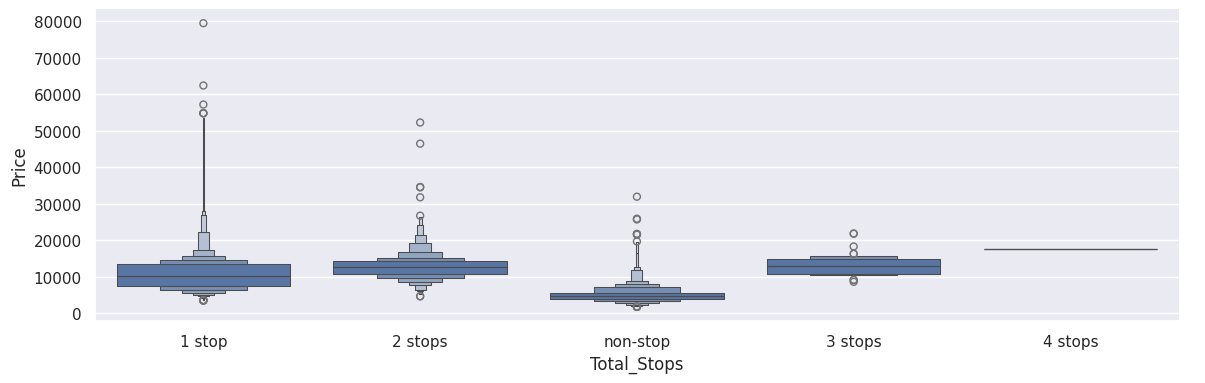

In [31]:
#Total_Stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending=False), kind="boxen", height=4, aspect=3)
plt.show()

###Non-Stop Travelling has Lesser Fare

# Feature Engineering and Preprocessing

In [32]:
###### From description we can see that Date_of_Journey is a object data type,
###### Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
###### For this we require pandas **to_datetime** to convert object data type to datetime dtype.

# .dt.day method will extract only day of that date
# .dt.month method will extract only month of that date

In [36]:
#extracting day from date of journey
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12


In [38]:
#extractting month from date of journey
train_data["Journey_Month"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5


In [39]:
#Since we whave converted date_of_journey  column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [40]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace=True)

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,21,35


#Time taken by plane to rach destination is called Duration
#It is the difference between Departure Time and Aarrival Time

In [51]:
# Assigning and converting duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) !=2:         # Check if duration contains only hour or mins
    if "h" in duration[i]:
      duration[i]=duration[i].strip()+" 0m"# Adds 0 minute
    else:
      duration[i]="0h "+duration[i]        # Adds 0 hour

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
  hours, minutes=duration[i].split(' ')
  duration_hours.append(int(hours[:-1]))   # Extract hours from duration
  duration_mins.append(int(minutes[:-1]))  # Extracts only minutes from duration

In [52]:
# Adding duration_hours and duration_mins list to train_data DataFrame
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins

In [54]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_Month', 'Dep_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [55]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [56]:
train_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,4,25,19,0


# Handling Categorical data

One can find many ways to handle categorical data. Some of the categorical data are:

1. **Nominal Data** = Data is not in any order, for which 'OneHotEncoder' is used in this case.
This is used in machine learning and data preprocessing to convert categorical data into a numerical format that can be effectively used by algorithms. It transforms each category in a categorical variable into a binary vector, ensuring no ordinal relationships are implied between categories.
**Ex** = Suppose you have a categorical variable "Color" with three categories: "Red," "Blue," and "Green." One-hot encoding will transform it into three binary columns:

2. **Ordinal Data** = Data is in the order, in this scenario 'LabelEncoder' is used.
This is a data preprocessing technique used to convert categorical data into numerical format, making it suitable for machine learning models. It assigns a unique integer to each category in a feature, enabling algorithms to process non-numeric data effectively.


In [58]:
train_data["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [59]:
# As Airline is nominal Categorical data we will perfrom Onehotencoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [60]:
train_data["Source"].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [63]:
# As Source is nominal categorical data we use onehotencoder

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [64]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [66]:
train_data['Route']

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL
...,...
10678,CCU → BLR
10679,CCU → BLR
10680,BLR → DEL
10681,BLR → DEL


In [ ]:
# As Additional Info